<h1>PEOPLE ANALYTICS - PREVENDO SE O COLABDORADOR VAI DEIXAR A EMPRESA</h1>

---

<h2>SUMÁRIO</h2>

<h2>INTRODUÇÃO</h2>

<h3>O que é People Analytics</h3>

People analytics é um processo de coleta e análise de dados voltado para a gestão de pessoas em empresas. O conceito nasce a partir da ideia de big data, que consiste na coleta, armazenamento e análise de um volume imenso de dados. Com tantas informações disponíveis ou passíveis de serem coletadas, as empresas têm identificado oportunidades de aproveitá-las para melhorar seus processos.

É bom deixar claro desde o começo que o People Analytics não é uma ferramenta ou um software. Trata-se de uma metodologia cujo princípio é a coleta, a organização e a análise de dados aplicada à gestão de pessoas para se ter uma visão mais estratégica do papel de cada colaborador dentro de uma empresa. Seu objetivo é melhorar a qualidade da tomada de decisão sobre os profissionais a partir da coleta e do cruzamento de informações relacionadas a eles. Assim, é possível tanto reconhecer um funcionário que se destaca quanto identificar problemas que estejam ocorrendo, como baixa produtividade, pouco engajamento, insatisfação, alto índice de rotatividade, entre outros.

<h3>Objetivo do projeto</h3>
Este projeto tem por objetivo aplicar técnicas de análise de dados para entender o comportamento dos colaboradores ao longo do tempo. No final, espera-se um modelo capaz de prever se o colaborador vai deixar ou não a empresa e um relatório completo sobre os resultados da análise.

<h3>Sobre o Dataset</h3>

O dataset se trata de um conjunto de dados fictícios de uma empresa fictícia. É um dataset próprio para estudo deste tema e contempla os seguintes atributos:
* **nivel_satisfacao**: O nível de satisfação é uma nota que representa o quão satisfeito o colaborador está trabalhando na empresa.
* **ultima_avaliacao**: A última avaliação representa a nota atribuída pelo usuário na última pesquisa de avaliação feita pela empresa.
* **numero_projetos**: Quantidade de projetos que o colaborador já atuou.
* **horas_medias_por_mes**: Média de horas trabalhadas por mês.
* **tempo_empresa**: Quantidade em anos que o colaborador está na empresa.
* **acidente_trabalho**: Indica se o colaborador já sofreu acidente de trabalho.
* **deixou_empresa**: Variável target e representa se o colaborador saiu da empresa.
* **ultima_promocao_5anos**: Atributo categórico que mostra se o colaborador teve promoção nos últimos 5 anos.
* **area**: Área de atuação dentro da empresa.
* **salario**: Faixa salarial categórica. Como o salário é uma informação sensível, o atributo está apenas dividio em salário: `baixo`, `médio` e `alto`. 


---
<h2>ANÁLISE EXPLORATÓRIA DOS DADOS</h2>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings
import re

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/dados_func.csv')

In [3]:
df.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h3>Visão Geral dos Dados</h3>

Primeiro irei realizar um breve estudo sobre como os dados estão concentrados. Irei verificar coisas como: Shape dos dados, isto é, quantidade de registros e atributos, irei verificar o nome das colunas, se há dados nulos, dentre outros passos.

In [4]:
df_eda = df.copy()

In [5]:
print(f'O dataset possui {df_eda.shape[0]} registros e {df_eda.shape[1]} colunas')

O dataset possui 14999 registros e 10 colunas


In [6]:
#Nome das colunas
df_eda.columns

Index(['nivel_satisfacao', 'ultima_avaliacao', 'numero_projetos',
       'horas_medias_por_mes', 'tempo_empresa', 'acidente_trabalho',
       'deixou_empresa', 'ultima_promocao_5anos', 'area', 'salario'],
      dtype='object')

In [7]:
#Verificação da ocorrência de dados missing
df_eda.isnull().sum()

nivel_satisfacao         0
ultima_avaliacao         0
numero_projetos          0
horas_medias_por_mes     0
tempo_empresa            0
acidente_trabalho        0
deixou_empresa           0
ultima_promocao_5anos    0
area                     0
salario                  0
dtype: int64

In [8]:
#Breve descrição estatística dos atributos. 
df_eda.describe()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df.skew()

nivel_satisfacao        -0.476360
ultima_avaliacao        -0.026622
numero_projetos          0.337706
horas_medias_por_mes     0.052842
tempo_empresa            1.853319
acidente_trabalho        2.021149
deixou_empresa           1.230043
ultima_promocao_5anos    6.636968
dtype: float64

**O que temos até agora?**<br/>
O dataset possui aproximadamente 15000 mil registros. É uma boa quantidade de dados para a construção de um modelo preditivo. O dataset está bastante limpo, portanto, iremos economizar bastante tempo na etapa de tratamento de valores missing.

Observando a descrição estatística, podemos tirar algumas conclusões:
* Na média, a empresa tem um nível de satisfação 6. É um nível razoável para bom;
* A última avaliação dos colaboradores teve média 7. Isso indica que a empresa teve uma melhora em relação ao nível de satisfação;
* O colaborador trabalha em média em 4 projetos.
* O colaborador fica em média por 4 anos na empresa.
* 14% dos colaboradores já sofreram acidente de trabalho.
* Os colaboradores trabalham em média 200 horas por mês.

Agora observando o skewness dos dados temos:
* Os atributos ultima_avaliacao e horas_medias_por_mes estão bastante próximos de zero, indicando que estas colunas muito provavelmente estão respeitando uma distribuição normal;
* Porém, a maioria dos atributos distoam bastante de zero, o que isso quer dizer? Que estes atributos muito provalvelmente não estão normalmente distribuídos;

> NOTA: A maioria das inferências estatísticas e também dos algoritmos de Machine Learning esperam que os dados estejam normalmente distribuídos, portanto, se aplicarmos estas técnicas com o conjunto de dados do jeito que está, com certeza teremos problemas. O que fazer?
> 1. Tratar outliers;
> 2. Realizar transformações, seja logarítmica, normalização e/ou escala dos dados;


---

<h2>ANÁLISE UNIVARIADA</h2>

Agora eu irei fazer uma análise mais detalhada para cada atributo, afim de compreender o que cada atributo representa individualmente.

<h3>.1) Deixou a Empresa (deixou_empresa)</h3>

In [10]:
#Cópia do dataset para não perder o dataset original
df_ind = df.copy()

In [11]:
#Proporção de colaboradores que deixaram a empresa
proporcao = pd.DataFrame(round(df_ind.groupby(['deixou_empresa'])['deixou_empresa'].count() / len(df_ind) * 100, 2))
proporcao

,deixou_empresa
deixou_empresa,
0,76.19
1,23.81


In [12]:
fig = px.pie(proporcao, values='deixou_empresa', names=['Não', 'Sim'], title='Proporção de colaboradores que deixaram a empresa')

fig.update_traces(marker=dict(colors=['#05995e', '#d12806']), textinfo='percent', textfont_size=16)

fig.update_layout(
    autosize=False,
    width=600,
    height=400
)

fig.show()

Vemos que aproximadamente 1 a cada 4 funcionários saem da empresa. Isso é um valor bastante elevado e no que isso impacta para o crescimento da empresa?
> 1. A empresa gasta muitos recursos financeiros e humanos em admissões e demissões;
> 2. Gasta tempo que poderia ser melhor utilizado aplicando processos seletivos;
> 3. Gasta muito recursos com treinamento;
> 4. Frea o crescimento, pois frequentemente a empresa precisa contratar novos colaboradores para as vagas que foram desocupadas, fazendo com que a empresa precise gastar recursos nos tópicos acima.

<h3>.2) Nível de Satisfação (nivel_satisfacao)</h3>

In [13]:
#Cabeçalho
df_ind.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
#Descrição dos dados
df_ind['nivel_satisfacao'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: nivel_satisfacao, dtype: float64

<AxesSubplot:xlabel='nivel_satisfacao', ylabel='Count'>

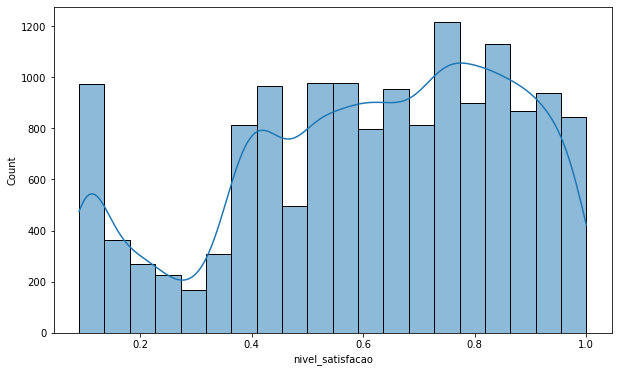

In [15]:
#Histograma com o nível de satisfação dos colaboradores
plt.figure(figsize=(10, 6))
sns.histplot(df_ind['nivel_satisfacao'] , kde=True, bins=20)

In [16]:
#função para automatizar o processo de exibição do gráfico de barras
def exibeBarplot(df, coluna, xlabel = 'x', ylabel = 'y', title = 'default', width=800, height=400):
    values = pd.DataFrame(df[coluna].value_counts().sort_index())
    values['percent'] = values[coluna].apply(lambda x: round(x / np.sum(values[coluna].values) * 100, 2))
    values['text1'] = values[coluna].astype(str)
    values['text2'] = values['percent'].astype(str)

    values['text'] = values['text1'] + ' [' + values['text2'] + '%]' 



    fig = px.bar(x=values.index, y=values[coluna], text=values['text'])

    fig.update_layout(
        title=f'<span>{title}</span>', 
        autosize=False,
        width=width,
        height=height,
        xaxis=dict(title=f'<span>{xlabel}</span>'),
        yaxis=dict(title=f'<span>{ylabel}</span>')
    )

    fig.show()

In [17]:
df_ind['nivel_satisfacao_bins'] = pd.cut(df_ind['nivel_satisfacao'], [-0.1, 0.2, 0.4, 0.6, 0.8, 1], 
                                        labels=['péssimo [0-20]', 'baixo [20-40]', 'médio [40-60]', 'bom [60-80]', 'ótimo [80-100]'])

Para melhorar a nossa compreensão sobre os dados, eu decidi separar as avaliações em grupos, dessa forma teremos uma ideia mais clara de como os dados estão dispostos:
* **Péssimo**: Avaliações entre: 0 e 0.2;
* **Baixo**: Entre 0.2 e 0.4;
* **Médio**: Entre 0.4 e 0.6;
* **Bom**: Entre 0.6 e 0.8;
* **Ótimo**: Entre 0.8 e 1.

In [18]:
exibeBarplot(df_ind, 'nivel_satisfacao_bins', title='Quantidade de nível de satisfação dos colaboradores', xlabel='Satisfação', ylabel='Quantidade')

**Considerações:**
* A média geral de satisfação fica em torno de 6, isso é um valor considerado razoável para uma empresa. Porém, para uma empresa que almeja ser o `great place to work` esse valor é um tanto quanto preocupante;
* Pelo histograma podemos ver que aproximadamente 1000 colaboradores não estão nada satisfeitos trabalhando na empresa;
* Vendo o gráfico por categorias temos que mais de 50% dos colaboradores estão com o nível de satisfação bom ou ótimo;

<h3>.3) Última Avaliação (ultima_avaliacao)</h3>

In [19]:
df['ultima_avaliacao'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: ultima_avaliacao, dtype: float64

[Text(0.5, 1.0, 'Histograma da última avaliação')]

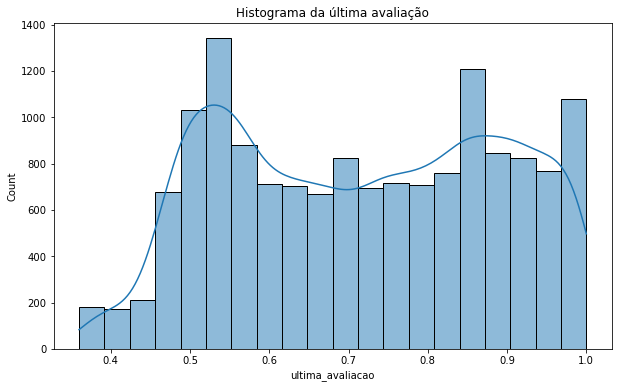

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ind['ultima_avaliacao'], kde=True, bins=20).set(title='Histograma da última avaliação')

In [21]:
df_ind['ultima_avaliacao_bins'] = pd.cut(df_ind['ultima_avaliacao'], [0, 0.2, 0.4, 0.6, 0.8, 1], 
                                        labels=['péssimo [0-20]', 'baixo [20-40]', 'médio [40-60]', 'bom [60-80]', 'ótimo [80-100]'])

In [22]:
exibeBarplot(df_ind, 'ultima_avaliacao_bins', xlabel='Satisfação', ylabel='Quantidade', title='Quantidade de satisfação na última avaliação')

**Considerações:**
* A média da última avaliação teve uma melhora em relação ao nível de satisfação, foi de 0.7;
* Outro ponto muito importante foi que a empresa não teve avaliações consideradas péssima e a quantidade de avaliações consideradas baixo foi de apenas 1.5%.
* A maioria das avaliações foi classificadas como ótima;

Isso mostra que a empresa vem melhorando o seu nível no que diz respeito em ser um local que os colaborades gostam de trabalhar. 

<h3>.4) Quantidade de Projetos (numero_projetos)</h3>

In [23]:
df_ind['numero_projetos'].describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: numero_projetos, dtype: float64

In [24]:
df_ind['numero_projetos'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: numero_projetos, dtype: int64

In [25]:
exibeBarplot(df_ind, coluna='numero_projetos', xlabel='Número de projetos' , ylabel='Quantidade', title='Quantidade por números de projeto', width=1000, height=600)

**Considerações**:
* A maioria dos colaboradores atuam/atuaram em 3 ou 4 projetos. Algums poucos atuaram em 7 projetos.
* Esse é um atributo que sozinho não diz muita coisa, pois não temos como mensurar o impacto que atuar em poucos ou vários projetos têm sobre a quantidade de colaboradores que deixaram a empresa.

<h3>.5) Média de horas trabalhadas por mês (horas_medias_por_mes)</h3>

In [26]:
df_ind['horas_medias_por_mes'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: horas_medias_por_mes, dtype: float64

In [27]:
week_mean = round(df_ind['horas_medias_por_mes'].describe()['mean'] / 4.5)
print(f'A média de horas trabalhadas por semana é de {week_mean} horas')

A média de horas trabalhadas por semana é de 45 horas


In [28]:
df_ind.sort_values(by=['horas_medias_por_mes'], ascending=False).head(20)

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
803,0.10,0.77,6,310,4,0,1,0,technical,medium,péssimo [0-20],bom [60-80]
809,0.11,0.97,7,310,4,0,1,0,support,medium,péssimo [0-20],ótimo [80-100]
1717,0.11,0.96,6,310,4,0,1,0,technical,low,péssimo [0-20],ótimo [80-100]
14975,0.10,0.79,7,310,4,0,1,0,hr,medium,péssimo [0-20],bom [60-80]
1936,0.11,0.97,6,310,4,0,1,0,accounting,medium,péssimo [0-20],ótimo [80-100]
1939,0.10,0.79,7,310,4,0,1,0,hr,medium,péssimo [0-20],bom [60-80]
1963,0.09,0.89,7,310,4,0,1,0,support,low,péssimo [0-20],ótimo [80-100]
14972,0.11,0.97,6,310,4,0,1,0,accounting,medium,péssimo [0-20],ótimo [80-100]
566,0.11,0.79,7,310,4,0,1,0,hr,low,péssimo [0-20],bom [60-80]
1985,0.11,0.84,7,310,4,0,1,0,sales,medium,péssimo [0-20],ótimo [80-100]


In [29]:
df_ind.sort_values(by=['horas_medias_por_mes'], ascending=True).head(5)

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
10020,0.50,0.58,4,96,3,0,0,0,sales,low,médio [40-60],médio [40-60]
2678,0.79,0.61,5,96,4,0,0,0,marketing,medium,bom [60-80],bom [60-80]
8605,0.48,0.43,3,96,3,0,0,0,support,low,médio [40-60],médio [40-60]
7492,0.15,0.98,2,96,2,0,0,0,sales,high,péssimo [0-20],ótimo [80-100]
9221,0.92,0.82,4,96,4,0,0,0,IT,medium,ótimo [80-100],ótimo [80-100]


In [30]:
fig = px.box(y=df['horas_medias_por_mes'])

fig.update_layout(
        title=f'<span>Boxplot de horas médias trabalhadas por mês</span>', 
        autosize=False,
        width=500,
        height=400,
        xaxis=dict(title=f'<span></span>'),
        yaxis=dict(title=f'<span>Horas</span>')
    )

fig.show()

**Considerações**:
* Considerando que o mês tenha mais ou menos 4.5 semanas, temos que a média de horas trabalhadas por semana é de 45 horas;
* Há vários colaboradores que trabalham 310 horas por mês, isso dá algo em por volta de 12 horas diárias durante 6 dias da semana;
    * Ao analisar o boxplot, percebemos que esses valores não indicam outliers e que há vários colabodores que tem essa carga horária mensal;

<h3>.6) Tempo como funcionário da empresa (tempo_empresa)</h3>

In [31]:
df_ind['tempo_empresa'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: tempo_empresa, dtype: float64

In [32]:
display(df_ind.sort_values(by=['tempo_empresa'], ascending=True).head(5))
display(df_ind.sort_values(by=['tempo_empresa'], ascending=False).head(5))

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
7499,0.93,0.58,5,238,2,0,0,0,sales,medium,ótimo [80-100],médio [40-60]
3966,0.82,0.58,4,202,2,0,0,0,RandD,medium,ótimo [80-100],médio [40-60]
9324,0.57,0.66,4,158,2,0,0,0,sales,low,médio [40-60],bom [60-80]
9325,0.55,0.54,5,168,2,0,0,0,sales,low,médio [40-60],médio [40-60]
3960,0.50,0.55,3,188,2,0,0,0,product_mng,medium,médio [40-60],médio [40-60]


,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
11630,0.68,0.67,4,162,10,0,0,0,management,high,bom [60-80],bom [60-80]
11230,0.99,0.84,4,142,10,0,0,0,technical,high,ótimo [80-100],ótimo [80-100]
13742,0.67,0.72,2,134,10,0,0,0,management,high,bom [60-80],bom [60-80]
11232,0.65,0.85,4,201,10,0,0,0,support,low,bom [60-80],ótimo [80-100]
13741,0.60,0.65,2,225,10,0,0,0,management,high,médio [40-60],bom [60-80]


In [33]:
df_ind['tempo_empresa'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: tempo_empresa, dtype: int64

In [34]:
exibeBarplot(df_ind, coluna='tempo_empresa', xlabel='Tempo médio como funcionário da empresa', ylabel='Quantidade', 
                width=1300, height=600, title='Quantidade de funcionários por tempo médio em anos na empresa')

**Considerações**:
* A maioria dos funcionários ficam cerca de 3 anos na empresa;
* A grande maioria fica no máximo por 4 anos;
* Poucos funcionárias ficaram mais do que 6 anos; 

<h3>.7) Acidente de Trabalho (acidente_trabalho)</h3>

In [35]:
df_ind['acidente_trabalho'].value_counts()

0    12830
1     2169
Name: acidente_trabalho, dtype: int64

In [36]:
exibeBarplot(df_ind, coluna='acidente_trabalho', xlabel='Acidentes de trabalho', ylabel='Quantidade', 
                title='Quantidade de pessoas que sofreram acidades de trabalho', width=600)

**Considerações**: 
* 14% dos colaboradores já sofreram acidente de trabalho. É como estar no meio de uma guerra, você não sabe se vai voltar vivo para casa 😂. Eu fiz uma brincadeira, mas esses dados são alarmantes, mas para frente veremos a relação que isso tem com as demais variáveis.

<h3>.8) Promoção do funcionário nos últimos 5 anos (ultima_promocao_5anos)</h3>

In [37]:
df_ind['ultima_promocao_5anos'].value_counts()

0    14680
1      319
Name: ultima_promocao_5anos, dtype: int64

In [38]:
exibeBarplot(df_ind, coluna='ultima_promocao_5anos', xlabel='Promoção [0 = Não|1 = Sim]', width=600, height=400,
                title='Quantidade de promoções por quantidade de funcionários nos últimos 5 anos')

**Considerações**:
* De 15000 mil colaboradores, apenas 300 tiveream promoções nos últimos 5 anos. Talvez isso explique porque tantos funcionários têm o tempo de empresa tão baixo e porque tantas demissões;
* Se a pessoa não vê perspectiva de crescimento, é muito difícil que ela continue estagnada no mesmo lugar;

<h3>.9) Área de atuação (area)</h3>

In [39]:
exibeBarplot(df_ind, coluna='area', xlabel='Áreas de atuação', ylabel='Quantidade', 
            title='Quantidade de pessoas por cargo', width=1300, height=500)

**Considerações**:
* A maioria dos colaboradores trabalham nas áreas de: `vendas`, `suporte` e `técnica`. É normal que empresa tenha mais colaboradores em áreas consideradas operacionais;
* As demais áreas possuem menos colaborades, pois se tratam de áreas mais estratégicas para a empresa;

<h3>.10) Salário categórico (salario)</h3>

In [40]:
exibeBarplot(df_ind, coluna='salario', xlabel='Categorias de salário', ylabel='Quantidade', 
            title='Quantidade por categoria de salário', width=900, height=500)

**Considerações**:
* A maioria dos colaboradores possuem salários considerados `baixo` ou `médio`;
* Olhando apenas para o contexto de categorias de salários por quantidade de colaboradores por área, pode até ser considerado normal essa distribuição. Pois é natural que a área operacional (que representa a maioria dos colaboradores, como visto anteriormente) recebam menos que as áreas estratégicas;
* Porém, é natural pensar que um lugar que tenha muitos `baixo salários` tambem terá muitos colaboradores que deixarão a empresa;


---

<h2>ANÁLISE MULTIVARIADA</h2>

Após analisar cada atributo, agora irei verificar como os atributos se correlacionam, para enteder quais fatores explicam os fenômenos apresentados.

In [41]:
df_mul = df_ind.copy()
df_mul.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
0,0.38,0.53,2,157,3,0,1,0,sales,low,baixo [20-40],médio [40-60]
1,0.80,0.86,5,262,6,0,1,0,sales,medium,bom [60-80],ótimo [80-100]
2,0.11,0.88,7,272,4,0,1,0,sales,medium,péssimo [0-20],ótimo [80-100]
3,0.72,0.87,5,223,5,0,1,0,sales,low,bom [60-80],ótimo [80-100]
4,0.37,0.52,2,159,3,0,1,0,sales,low,baixo [20-40],médio [40-60]


In [42]:
#Criação de uma função para automatizar a apresentação do gráfico de barras
def exibeBarplotMult(df, colunaIndex, labels, x, y, z, title='Default', xlabel='x_default', ylabel='y_default', width=1000, height=600):
    fig = go.Figure()

    for key, value in enumerate(labels):

        _df = df.loc[df[colunaIndex] == key]

        fig.add_traces(go.Bar(
            x=_df[x],
            y=_df[y],
            name=value,
            text=_df[z]
        ))

    fig.update_layout(
        title=f'<span>{title}</span>', 
        autosize=False,
        width=width,
        height=height,
        xaxis=dict(title=f'<span>{xlabel}</span>'),
        yaxis=dict(title=f'<span>{ylabel}</span>')
    )

    fig.show()

    #return fig

<h3>.1) Deixou a empresa com as demais variáveis</h3>

A primeira análise será a cerca da variável target. Vamos verificar como o atributo `deixou_empresa` se correlacionam com os demais atributos.

**Matriz de Correlação**<br/>

<AxesSubplot:>

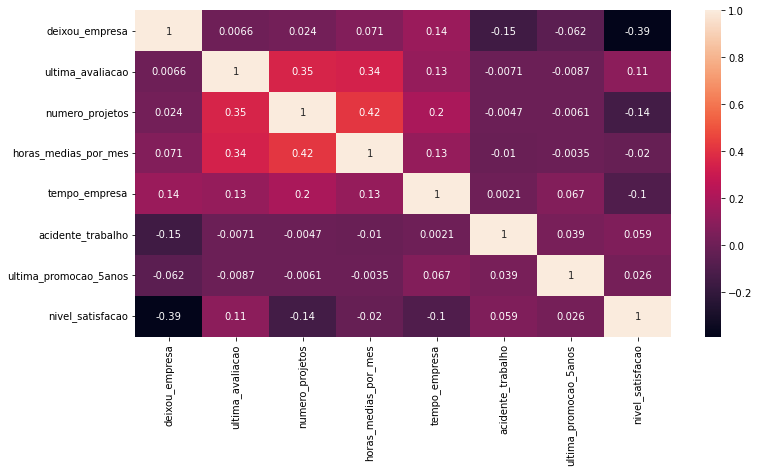

In [43]:
df_corr = df_mul[['deixou_empresa', 'ultima_avaliacao', 'numero_projetos',
       'horas_medias_por_mes', 'tempo_empresa', 'acidente_trabalho',
       'ultima_promocao_5anos', 'nivel_satisfacao', 'area', 'salario', 'nivel_satisfacao_bins', 'ultima_avaliacao_bins']].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(df_corr, annot=True)

Uma análise interessante a ser feita é a matriz de correlação entre os atritubos, vemos que:
* O atributo nivel_satisfacao é o que mais se relaciona com o atributo deixou_empresa, nota que a correlação é negativa, isto é, à medida que os colaboradores deixam a empresa, o nivel de satisfação diminui;

Outras correlações interessantes:
* Última avaliação aumenta conforme o Números de projetos também aumenta;
* Última avaliação aumenta conforme a quantidade de horas médias trabalhadas aumenta;
* Números de horas trabalhadas aumenta à medida que a quantidade de projetos também aumenta (Essa aqui era esperado de acontecer);


In [44]:
def compararAtributos(df, coluna1, coluna2, colunaAlvo, aggFunc, percent=False):
    df_temp = df.copy()
    df_temp = df_temp.groupby([coluna1, coluna2], as_index=False)[colunaAlvo].agg(aggFunc)
    if percent:
        df_temp['percent'] = df_temp['count'].apply(lambda x: round(x / np.sum(df_temp['count']) * 100, 2))
    
    df_temp = df_temp.reset_index()
    df_temp = df_temp.sort_values(by=[coluna1, coluna2], ascending=True)

    return df_temp

**Deixou a empresa com Nível de Satisfação**<br/>

In [45]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'nivel_satisfacao_bins', 'nivel_satisfacao', ['count'], percent=True)
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='nivel_satisfacao_bins', 
                y='count', z='percent', labels=['Não', 'Sim'], 
                width=1200, height=400, 
                title='Quantidade de demissões e não demissões por grupo de satisfação dos colaboradores',
                xlabel='Nível de satisfação', ylabel='Quantidade')

,deixou_empresa,nivel_satisfacao_bins,count,percent
0,0,péssimo [0-20],554,3.69
1,0,baixo [20-40],835,5.57
2,0,médio [40-60],2740,18.27
3,0,bom [60-80],3846,25.64
4,0,ótimo [80-100],3453,23.02
5,1,péssimo [0-20],924,6.16
6,1,baixo [20-40],811,5.41
7,1,médio [40-60],865,5.77
8,1,bom [60-80],422,2.81
9,1,ótimo [80-100],549,3.66


**Deixou a empresa com Última Avaliação**<br/>

In [46]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'ultima_avaliacao_bins', 'ultima_avaliacao', ['count', 'mean'], percent=True)
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='ultima_avaliacao_bins', 
                y='count', z='percent', labels=['Não', 'Sim'], 
                width=1200, height=400, 
                title='Quantidade de demissões e não demissões por última avaliação dos colaboradores',
                xlabel='Última avaliação', ylabel='Quantidade')

,deixou_empresa,ultima_avaliacao_bins,count,mean,percent
0,0,péssimo [0-20],0,NaN,0.00
1,0,baixo [20-40],236,0.382839,1.57
2,0,médio [40-60],3112,0.529865,20.75
3,0,bom [60-80],4282,0.703206,28.55
4,0,ótimo [80-100],3798,0.902056,25.32
5,1,péssimo [0-20],0,NaN,0.00
6,1,baixo [20-40],0,NaN,0.00
7,1,médio [40-60],1615,0.512087,10.77
8,1,bom [60-80],265,0.751887,1.77
9,1,ótimo [80-100],1691,0.909586,11.27


Curioso analisar que vários dos colaboradores que fizeram a última avaliação de satisfação como ótimo deixaram a empresa logo em seguida.


**Deixou a Empresa por Área de atuação**<br/>

In [47]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'area', 'ultima_avaliacao', ['count'], percent=True)
display(df_temp)


exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='area', 
                y='count', z='percent', labels=['Não', 'Sim'], 
                width=1200, height=400, 
                title='Quantidade de demissões e não demissões por area de atuação',
                xlabel='Area', ylabel='Quantidade')

,deixou_empresa,area,count,percent
0,0,IT,954,6.36
1,0,RandD,666,4.44
2,0,accounting,563,3.75
3,0,hr,524,3.49
4,0,management,539,3.59
5,0,marketing,655,4.37
6,0,product_mng,704,4.69
7,0,sales,3126,20.84
8,0,support,1674,11.16
9,0,technical,2023,13.49


De maneira geral, a maioria dos colaboradores que deixaram a empresa são das áreas de vendas, suporte e técnica. Isso é normal, já que são as areas com a maior quantidade de colaboradores;

**Deixou a empresa com Número de Projetos**<br/>

In [48]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'numero_projetos', 'area', ['count'], percent=True)
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='numero_projetos', 
                y='count', z='percent', labels=['Não', 'Sim'], 
                width=1200, height=400, 
                title='Quantidade de demissões e não demissões por quantidade de projetos',
                xlabel='Quantidade de projetos', ylabel='Quantidade')

,deixou_empresa,numero_projetos,count,percent
0,0,2,821,5.47
1,0,3,3983,26.56
2,0,4,3956,26.38
3,0,5,2149,14.33
4,0,6,519,3.46
5,1,2,1567,10.45
6,1,3,72,0.48
7,1,4,409,2.73
8,1,5,612,4.08
9,1,6,655,4.37


**Deixou a empresa com Tempo de Empresa**<br/>

Um fenômeno interessante:
* A medida que a quantidade de projetos aumenta, a quantidade de deixou a empresa também aumenta, até o ponto de que todos os colaboradores que atuaram em 7 projetos sairam da empresa;
* Porém, a maioria todos os colaboradores que atuaram em apenas dois projetos deixaram a empresa;

In [49]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'tempo_empresa', 'area', ['count'], percent=True)
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='tempo_empresa', 
                y='count', z='percent', labels=['Não', 'Sim'], 
                width=1200, height=400, 
                title='Quantidade de demissões e não demissões por tempo de empresa',
                xlabel='Tempo de empresa', ylabel='Quantidade')

,deixou_empresa,tempo_empresa,count,percent
0,0,2,3191,21.27
1,0,3,4857,32.38
2,0,4,1667,11.11
3,0,5,640,4.27
4,0,6,509,3.39
5,0,7,188,1.25
6,0,8,162,1.08
7,0,10,214,1.43
8,1,2,53,0.35
9,1,3,1586,10.57


**Deixou a empresa com Acidente de Trabalho**<br/>

O fator tempo também é importante aqui:
* Quanto mais tempo na empresa, menor a chance do colaborador deixar a empresa;

In [50]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'acidente_trabalho', 'area', ['count'], percent=True)
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='acidente_trabalho', 
                y='count', z='percent', labels=['Não', 'Sim'], 
                width=600, height=400, 
                title='Quantidade de demissões e não demissões por ocorrência de acidentes de trabalho',
                xlabel='Acidente', ylabel='Quantidade')

,deixou_empresa,acidente_trabalho,count,percent
0,0,0,9428,62.86
1,0,1,2000,13.33
2,1,0,3402,22.68
3,1,1,169,1.13


Apenas 1% de todos os colaboradores sofreram acidentes de trabalha E deixaram a empresa, isso mostra que talvez o evento sofrer acidente não seja tão relevante para o colaborador deixar a empresa.

**Deixou a empresa com Última Promoção nos últimos 5 anos**<br/>

In [51]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'ultima_promocao_5anos', 'area', ['count'], percent=True)
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='ultima_promocao_5anos', 
                y='count', z='percent', labels=['Não', 'Sim'], 
                width=800, height=400, 
                title='Quantidade de demissões e não demissões por última promoção nos últimos 5 anos',
                xlabel='Promoção', ylabel='Quantidade')

,deixou_empresa,ultima_promocao_5anos,count,percent
0,0,0,11128,74.19
1,0,1,300,2.00
2,1,0,3552,23.68
3,1,1,19,0.13


Veja que praticamente nenhum colaborador que teve promoção nos últimos 5 anos saiu da empresa. Contudo, nota que apenas 2.13% dos colaboradores tiveram promoção nos últimos 5 anos.
Vemos que a empresa não tem um plano de carreira para seus colaboradores, é natural que as pessoas se desmotivem com o tempo; 

**Deixou a empresa com Salário**<br/>

In [52]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'salario', 'area', ['count'], percent=True)
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='salario', 
                y='count', z='percent', labels=['Não', 'Sim'], 
                width=800, height=400, 
                title='Quantidade de demissões e não demissões por categoria de salario',
                xlabel='Promoção', ylabel='Quantidade')

,deixou_empresa,salario,count,percent
0,0,high,1155,7.70
1,0,low,5144,34.30
2,0,medium,5129,34.20
3,1,high,82,0.55
4,1,low,2172,14.48
5,1,medium,1317,8.78


Um fenômeno que já era esperado:
* Pessoas que tem um salário na categoria baixo, seguido de médio são mais propensos a deixaram a empresa;

**Deixou a empresa com Horas Médias por Mês**<br/>

In [53]:
fig = px.histogram(df_mul, 
                    x=df_mul['horas_medias_por_mes'], 
                    marginal='box', 
                    barmode ='overlay', 
                    histnorm ='density', 
                    color='deixou_empresa',
                    labels =[{1: 'Sim'}, {0: 'Não'}],
                    color_discrete_map={0: '#148080', 1: '#F20505'}
                    )  
fig.update_layout(
    title_text="Distribuição de horas médias trabalhadas por mês"
)
fig.show()

Temos duas situações aqui:
* Os colaboradores que trabalham entre 125~164 horas semanais são mais propensos a deixarem a empresa;
* A partir das 215 horas semanais o histograma de colaboradores que deixaram a empresa volta a crescer;
* Poucos funcionários que fazem mais de 275 horas semanais continuam na empresa;

<h3>.2) Nível de satisfação com as demais variáveis</h3>

**Nível de Satisfação com Última Avaliação**<br/>

In [54]:
df_temp = df_mul.groupby(['nivel_satisfacao_bins', 'ultima_avaliacao_bins'], as_index=False)['deixou_empresa'].agg(['count'])
df_temp['percent'] = df_temp['count'].apply(lambda x: round(x / np.sum(df_temp['count']) * 100, 2))

display(df_temp.sort_values(by=['percent'], ascending=False))

,,count,percent
nivel_satisfacao_bins,ultima_avaliacao_bins,,
ótimo [80-100],ótimo [80-100],1756,11.71
bom [60-80],ótimo [80-100],1714,11.43
médio [40-60],médio [40-60],1620,10.80
bom [60-80],bom [60-80],1492,9.95
ótimo [80-100],bom [60-80],1311,8.74
médio [40-60],bom [60-80],1049,6.99
baixo [20-40],médio [40-60],1038,6.92
bom [60-80],médio [40-60],1003,6.69
péssimo [0-20],ótimo [80-100],917,6.11


Nesta tabela vemos a relação do nível de satisfação com a última avaliação. Nota que a maioria das últimas avaliações são melhores do que o nível de satisfação, isso demonstra que a empresa vem melhorando.

**Nível de Satisfação com Números de Projetos**<br/>

In [55]:
df_temp = compararAtributos(df_mul, 'nivel_satisfacao_bins', 'numero_projetos', 'deixou_empresa', ['count'], percent=True)

display(df_temp.sort_values(by='percent', ascending=False))

df['numero_projetos'] = df['numero_projetos'].astype(str)

,nivel_satisfacao_bins,numero_projetos,count,percent
20,bom [60-80],4,1557,10.38
26,ótimo [80-100],4,1493,9.95
19,bom [60-80],3,1449,9.66
25,ótimo [80-100],3,1253,8.35
12,médio [40-60],2,1073,7.15
13,médio [40-60],3,1034,6.89
27,ótimo [80-100],5,998,6.65
14,médio [40-60],4,950,6.33
21,bom [60-80],5,922,6.15
6,baixo [20-40],2,876,5.84


A maioria das pessoas que têm satisfação nível bom e ótimo veêm uma boa quantidade de projetos como sendo 3 ou 4 projetos.

**Nível de satisfação por horas médias por mês**<br/>

In [56]:
fig = px.histogram(df_mul, 
                    x=df_mul['horas_medias_por_mes'], 
                    marginal='box', 
                    barmode ='overlay', 
                    histnorm ='density', 
                    color='nivel_satisfacao_bins',
                    #labels =[{1: 'Sim'}, {0: 'Não'}],
                    color_discrete_map={'baixo [20-40]': '#fcba03', 'péssimo [0-20]': '#eb290c', 'médio [40-60]': '#949494', 'bom [60-80]': '#00f239', 'ótimo [80-100]': '#0576e8'}
                    )  
fig.update_layout(
    title_text="Distribuição de horas médias trabalhadas por mês",
    width=1200,
    height=700
)
fig.show()

Pela visualização por boxplot fica nítido que a quantidade de horas trabalhadas por mês afeta diretamente na satisfação dos colaboradores, observa que:
* **Satisfação péssima**: São os colaboradores que trabalham muitas horas semanais, são os trabalhadores que fazem muita hora extra no serviço;
* **Satisfação baixa**: Se concentra mais nos colaboradores que trabalham poucas horas por semana;
* **Satisfação média**: Colaboradores que trabalham em média 40 horas semanais;
* **Satisfação boa e ótima**: Se concentra principalmente nos trabalhadores que tem a jornada semanal de 44~ horas em média.


**Nível de satisfação por tempo de empresa**<br/>

In [65]:
df_temp = compararAtributos(df_mul, 'nivel_satisfacao_bins', 'tempo_empresa', 'deixou_empresa', ['count'], percent=False)

df_temp = df_temp.sort_values(by='tempo_empresa', ascending=False)

df_temp

,nivel_satisfacao_bins,tempo_empresa,count
39,ótimo [80-100],10,58
7,péssimo [0-20],10,6
15,baixo [20-40],10,20
23,médio [40-60],10,64
31,bom [60-80],10,66
6,péssimo [0-20],8,6
30,bom [60-80],8,56
14,baixo [20-40],8,12
38,ótimo [80-100],8,48
22,médio [40-60],8,40


Veja só, há funcionários que estão na empresa há 10 anos e possuem nível de satisfação péssimo.

**Nível de satisfação por acidente de trabalho**<br/>

In [73]:
fig = px.histogram(df_mul, 
                    x=df_mul['nivel_satisfacao_bins'], 
                    
                    barmode ='overlay', 
                    histnorm ='density', 
                    color='acidente_trabalho',
                    #labels =[{1: 'Sim'}, {0: 'Não'}],
                    color_discrete_map={'baixo [20-40]': '#fcba03', 'péssimo [0-20]': '#eb290c', 'médio [40-60]': '#949494', 'bom [60-80]': '#00f239', 'ótimo [80-100]': '#0576e8'}
                    )  
fig.update_layout(
    title_text="Nível de satisfação por quantidade de ocorrências de acidentes de trabalho",
    width=800,
    height=400
)
fig.show()

O fato de o colaborador ter sofrido acidente de trabalho parece não ter relação com seu nível de satisfação trabalhando na empresa. Mais um indício de que sofrer acidente no trabalho não impacta na taxa de demissões na empresa.

**Nível de satisfação por promoção nos últimos 5 anos**<br/>

In [75]:
fig = px.histogram(df_mul, 
                    x=df_mul['nivel_satisfacao_bins'], 
                    
                    barmode ='overlay', 
                    histnorm ='density', 
                    color='ultima_promocao_5anos',
                    #labels =[{1: 'Sim'}, {0: 'Não'}],
                    color_discrete_map={'baixo [20-40]': '#fcba03', 'péssimo [0-20]': '#eb290c', 'médio [40-60]': '#949494', 'bom [60-80]': '#00f239', 'ótimo [80-100]': '#0576e8'}
                    )  
fig.update_layout(
    title_text="Nível de satisfação por promoções nos últimos 5 anos",
    width=800,
    height=400
)
fig.show()

Agora uma tendência que já era esperada. Os colaboradores que tiverem promoção em sua maioria têm um nível de satisfação `médio`, `bom` ou `ótimo`. Em contrapartida, poucos colaboradores que tiveram promoção possuem um nível de satisfação `baixo` ou `péssimo`.

**Nível de satisfação por area de atuação**<br/>

In [104]:
df_temp = compararAtributos(df_mul, 'nivel_satisfacao_bins', 'area', 'deixou_empresa', ['count'], percent=False)

In [105]:
total = df_temp.groupby(['area'], as_index=False)['count'].transform('sum')

# as float
df_temp['% do grupo'] = df_temp['count'].div(total['count'])

df_temp = df_temp.sort_values(by=['area', '% do grupo'], ascending=[True, False])
df_temp

,nivel_satisfacao_bins,area,count,% do grupo
30,bom [60-80],IT,373,0.303993
40,ótimo [80-100],IT,333,0.271394
20,médio [40-60],IT,268,0.218419
0,péssimo [0-20],IT,127,0.103504
10,baixo [20-40],IT,126,0.102689
31,bom [60-80],RandD,230,0.292249
41,ótimo [80-100],RandD,219,0.278272
21,médio [40-60],RandD,188,0.238882
1,péssimo [0-20],RandD,75,0.095299
11,baixo [20-40],RandD,75,0.095299


Podemos ver que a maioria dos colaboradores por area classificam o nível de satisfeito como `bom`. A única area que a maioria dos funcionários são `ótimo` é a área de `product_mng`.
* Por que a maioria dos colaboradores classificam como ótimo? O que fazer nas outras áreas para que sejam como a de `product_mng`?

Mas agora vamos nos concetrar nos valores `baixo` ou `péssimo`.

In [106]:
df_ruim = df_temp.loc[(df_temp['nivel_satisfacao_bins'] == 'péssimo [0-20]') | (df_temp['nivel_satisfacao_bins'] == 'baixo [20-40]')]
df_ruim

,nivel_satisfacao_bins,area,count,% do grupo
0,péssimo [0-20],IT,127,0.103504
10,baixo [20-40],IT,126,0.102689
1,péssimo [0-20],RandD,75,0.095299
11,baixo [20-40],RandD,75,0.095299
12,baixo [20-40],accounting,114,0.148631
2,péssimo [0-20],accounting,87,0.113429
13,baixo [20-40],hr,93,0.125846
3,péssimo [0-20],hr,71,0.096076
14,baixo [20-40],management,54,0.085714
4,péssimo [0-20],management,50,0.079365


In [107]:
df_ruim = pd.DataFrame(df_ruim.groupby(['area'])['% do grupo'].sum()).sort_values(by=['% do grupo'], ascending=False)
df_ruim

,% do grupo
area,
accounting,0.262060
hr,0.221922
technical,0.218015
sales,0.206522
IT,0.206194
support,0.204576
marketing,0.202797
product_mng,0.192905
RandD,0.190597


Aqui temos a porcentagem por área de nível de satisfação `baixo` e `péssimo`.
* 26% dos colaboradores da area de accounting não estão satisfeitos.
* 22% dos colaboradores da area de RH não estão satisfeitos.

**Nível de satisfação por salário**<br/>

In [132]:
df_temp = compararAtributos(df_mul, 'nivel_satisfacao_bins', 'salario', 'deixou_empresa', ['count'], percent=True)

total = df_temp.groupby(['salario'], as_index=False)['count'].transform('sum')

# as float
df_temp['% do grupo'] = df_temp['count'].div(total['count'])
df_temp['% do grupo'] = df_temp['% do grupo'].apply(lambda x: round(x * 100, 2))

df_temp = df_temp.sort_values(by=['salario', '% do grupo'], ascending=[True, False])
df_temp

,nivel_satisfacao_bins,salario,count,percent,% do grupo
9,bom [60-80],high,410,2.73,33.14
12,ótimo [80-100],high,320,2.13,25.87
6,médio [40-60],high,315,2.10,25.46
3,baixo [20-40],high,112,0.75,9.05
0,péssimo [0-20],high,80,0.53,6.47
10,bom [60-80],low,1970,13.13,26.93
13,ótimo [80-100],low,1925,12.83,26.31
7,médio [40-60],low,1727,11.51,23.61
4,baixo [20-40],low,886,5.91,12.11
1,péssimo [0-20],low,808,5.39,11.04


Por salário temos que 6% dos colaboradores que possuem o salário alto não estão nada satisfeitos com a empresa. 23% dos colaboradores que possuem salário baixo estão nada satisfeitos ou pouco satisfeitos com a empresa.

In [133]:
df_ruim = df_temp.loc[(df_temp['nivel_satisfacao_bins'] == 'péssimo [0-20]') | (df_temp['nivel_satisfacao_bins'] == 'baixo [20-40]')]

df_ruim = pd.DataFrame(df_ruim.groupby(['salario'], as_index=False)['% do grupo'].sum()).sort_values(by=['% do grupo'], ascending=False)

df_ruim['% do grupo'] = df_ruim['% do grupo'].apply(lambda x: round(x, 2))

df_ruim

,salario,% do grupo
1,low,23.15
2,medium,19.20
0,high,15.52


In [136]:
fig = px.bar(x=df_ruim['salario'], y=df_ruim['% do grupo'], text=df_ruim['% do grupo'])

fig.update_layout(
        title='<span>Porcentagem por grupo de salario de colaboradores instatisfeitos</span>', 
        autosize=False,
        width=700,
        height=500,
        xaxis=dict(title='<span>Faixa de salário</span>'),
        yaxis=dict(title='<span>Porcentagem</span>')
    )

fig.show()

Aparentemente podemos ver que quanto maior o salário, mais o colaborador tende a se sentir satisfeito com o emprego.

---

<h2>PRÉ PROCESSAMENTO DOS DADOS</h2>

Agora que fizemos todas as análises e temos vários insights sobre os dados, vamos realizar a etapa de pré-processamento. Nesta etapa iremos tratar os outliers, padronizar e aplicar transformações de escala nos dados.

<h3>Importação das bibliotecas</h3>

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC


# Bibliotecas para computação estatística
from scipy import stats

Abaixo irei criar uma classe de apoio para auxiliar no one hot encoder do nosso dataset. Esta classe aplicar o one-hot-encoder e também nomeia os atributos que foram transformados.

In [ ]:
class MyHotEncoder:
    def __init__(self, df, cols):
        self.df = df
        self.list_oneHotEncoder = []
        self.list_col = []

        if isinstance(cols, list):
            self.list_col = cols
        else:
            self.list_col.append(cols)

    #Treina os dados passados.
    def fit_transform(self):

        self.df.reset_index(drop=True, inplace=True) #Reseta o index do dataset para não causar problemas
        X = self.df.values

        #Para cada coluna crie uma string contendo o nome do atributo e o nome da categoria.
        #Exemplo de saída: [sex_male]
        for col in self.list_col: 
            valores = list(self.df[col].sort_values().unique())
            colunas = []
            for i in valores:
                colunas.append(col + '_' + str(i))
            colunas = colunas + list(self.df.columns)
            
            #One hot encoder para treinar
            onehotencoder = OneHotEncoder(handle_unknown='ignore')
            self.list_oneHotEncoder.append(onehotencoder)

            enc_df = onehotencoder.fit_transform(self.df[[col]]).toarray()
            enc_df = pd.DataFrame(enc_df)
            
            #União do dataset gerado ao dataset original
            self.df = enc_df.join(self.df)
            self.df.columns = colunas
            self.df.drop(col, axis=1, inplace=True)
        
        return self.df

    #Apenas aplica a transformação a novos dados.
    def transform(self, df):
        
        for i in range(len(self.list_col)):
            col = self.list_col[i]

            valores = list(df[col].sort_values().unique())
            colunas = []
            for j in valores:
                colunas.append(col + '_' + str(j))
            colunas = colunas + list(df.columns)

            #One hot encoder para transformar
            enc_df = self.list_oneHotEncoder[i].transform(df[[col]]).toarray()
            enc_df = pd.DataFrame(enc_df)

            #União do dataset gerado ao dataset original
            df = enc_df.join(df)
            df.columns = colunas
            df.drop(col, axis=1, inplace=True)


        return df   

<h3>Tratamento de outliers</h3>

In [ ]:
if df_ind['nivel_satisfacao'].dtypes == 'float64':
    print(True)

for coluna in df_ind.columns:
    if df_ind[coluna].dtypes == 'float64' or df_ind[coluna].dtypes == 'int64':
        fig = px.box(y=df_ind[coluna])
        fig.update_layout(
            title_text=f"Boxplot: {coluna}",
            width=400,
            height=300
        )
        fig.show()

**Considerações**:
* Pelas análises prévias, consideramos que o atributo sobre ocorrência de acidentes de trabalho não impacta no evento de o colaborador deixar a empresa;
* Colaboradores com mais do que 6 anos de empresa são mínimos e a quantidade de colaboradores com MAIS de 6 anos E que deixaram a empresa é zero. Porém a quantidade colaboradores com exatos 6 anos de empresa e que deixaram a empresa é significativa, por isso, mesmo com o valor 6 anos sendo considerado outlier, eu irei apenas remover os colaboradores com tempo_empresa MAIOR que 6 anos.

In [ ]:
df_ind.loc[df_ind['tempo_empresa'] >= 6, 'deixou_empresa'].value_counts()

Exemplo do que eu estou falando. 

Agora para remover os outliers eu poderia simplesmente utilizar o drop do pandas considerando os tempo_empresa maior que 6. Mas eu quero realizar essa etapa de maneira quantitativa, por isso irei aplicar o calculo do z-score para obter os dados outliers novamente. O Z-Score também é chamado de pontuação padrão. Este valor/pontuação ajuda a entender a que distância o ponto de dados está da média. E depois de definir um valor limite, pode-se utilizar os valores de pontuação z dos pontos de dados para definir os valores discrepantes.

Agora, para definir um valor limite de outlier é escolhido geralmente o valor 3. Como 99,7% dos pontos de dados estão entre +/- 3 desvios padrão (usando a abordagem de distribuição de Gauss).

In [ ]:
#Cálculo do Z-score
z = np.abs(stats.zscore(df_ind['tempo_empresa']))

#Definindo o threshold igual a 3 desvios padrão
threshold = 3
indices = np.where(z > 3)

#Visualizando os outliers
df_temp = df_ind.iloc[indices]


df_temp['tempo_empresa'].value_counts()

Observe que pelo calculo do z-score obtemos como outliers somente os valores tempo_empresa que são 8 e 10 anos, portanto, agora é só aplicar o drop dos registros na tabela.

> **NOTA**: Por que a visualização do boxplot considera os valores 6 anos de empresa como outliers e a pontuação por z-score não?<br/><br/>
> **Resposta**: Isso acontece porque a pontuação Z-Score considera como sendo outliers dados que estão a mais de 3 desvios-padrão de distância do centro. Por outro lado, o cálculo utilizado para os boxplot é o calculo de IQR que considera 2,68 desvios-padrão de distância do centro. 

In [ ]:
#Removendo os outliers
df_ind.drop(index=np.array(indices).reshape(-1), inplace=True)
df_ind.reset_index(inplace=True, drop=True)
df_ind.head()

<h3>Primeira seleção de atributos e one hot encoder</h3>

Agora irei selecionar os atributos que serão utilizados como variáveis preditoras e o atributo target. Irei selecionar todos os atributos iniciais para a construção de um modelo base.<br/>
Após concluído o modelo base, irei testar e avaliar quais são os atributos mais relevantes para o modelo.


In [ ]:
#Seleção dos atributos preditores
X = df_ind[['nivel_satisfacao', 'ultima_avaliacao', 'numero_projetos', 'horas_medias_por_mes', 'tempo_empresa', 'acidente_trabalho',
       'ultima_promocao_5anos', 'area', 'salario']]

#Seleção do atributo target
Y = df_ind['deixou_empresa']

X.head()

In [ ]:
#Aplicando a classe que foi definida MyHotEncoder para realizar o One Hot Encoding dos atributos.
my_encoder = MyHotEncoder(X,['area', 'salario'])
x_encoded = my_encoder.fit_transform()

In [ ]:
display(x_encoded.head(3))

In [ ]:
#Convertendo de dataframe para array de valores.
x_encoded_val = x_encoded.values

<h3>Modelagem base para primeira avaliação</h3>

Aqui irei criar um modelo base com o objetivo de avaliar os melhores parâmetros e como os dados se saem quando expostos a um algoritmo de Machine Learning.

In [ ]:
scaler = StandardScaler()

x_encoded_scaler = scaler.fit_transform(x_encoded_val)

**Separando os dados em treino e teste e Balanceando o dataset**

In [ ]:
#Separando os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(x_encoded_scaler, Y, test_size = 0.3, random_state = 0)

Quando se trabalha com Machine Learning, um dos problemas é o fato de termos datasets desbalanceados, isto é, uma classe tem maior quantidade do que outro. Esse é um problema que pode acarretar em um modelo enviesado.

Para resolver isso irei utilizar um pacote chamado RandomUnderSampler que irá realizar esse trbalho de balancear o dataset. 

In [ ]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, Y_train)

**KNN**

Como primeira modelo, irei utilizar um dos mais simples de todos, o KNN. Vamos verificar se a relação por proximidade de vizinhança se mostra boa o suficiente;

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_rus, y_rus)

preds = knn.predict(X_test)
f_score = f1_score(preds, Y_test)
ac_score = accuracy_score(preds, Y_test)

print('F1 score em Teste = {:.2f}%'.format(f_score * 100))
print('Acurácia em Teste = {:.2f}%'.format(ac_score * 100))

**Regressão Logística**

O próximo modelo será um método linear generalizado. A regressão logística é útil para modelar a probabilidade de um evento ocorrer em função de outros fatores.

In [ ]:
logisticReg = LogisticRegression()
logisticReg.fit(X_rus, y_rus)

preds = logisticReg.predict(X_test)
f_score = f1_score(preds, Y_test)
ac_score = accuracy_score(preds, Y_test)

print('F1 score em Teste = {:.2f}%'.format(f_score * 100))
print('Acurácia em Teste = {:.2f}%'.format(ac_score * 100))

**Random Forest**

Agora vamos utilizar as árvores de devisão.

In [ ]:
randomForest = RandomForestClassifier()
randomForest.fit(X_rus, y_rus)

preds = randomForest.predict(X_test)
f_score = f1_score(preds, Y_test)
ac_score = accuracy_score(preds, Y_test)

print('F1 score em Teste = {:.2f}%'.format(f_score * 100))
print('Acurácia em Teste = {:.2f}%'.format(ac_score * 100))

Nosso primeiro modelo base teve uma ótima performance aplicando o algoritmo de Random Forest, agora vamos selecionar as principais features para aplicar no nosso próximo modelo.

**Seleção das features mais importantes**

In [ ]:
df_temp = pd.DataFrame(randomForest.feature_importances_, index=x_encoded.columns, columns=['importance']).sort_values(by='importance', ascending=False)

display(df_temp)
colunas_importantes = list(df_temp.loc[df_temp['importance'] > 0.1].index)


plt.figure(figsize=(12,8))
sns.barplot(x=df_temp['importance'], y=df_temp.index)



**Considerações**:
O modelo considerou apenas 5 parâmetros como sendo muito importantes, são eles: `nivel_satisfacao`, `tempo_empresa`, `horas_medias_por_mes`, `numero_projetos`, `ultima_avaliacao`. Portanto, serão estes os parâmetros uqe iremos considerar para o próximo modelo.

<h2>MODELAGEM</h2>

Agora sim, iremos realmente criar o modelo final do projeto. Primeiro irei criar uma lista contendo várias técnicas e vários parâmetros. Todos estes parâmetros serão testados utilizando o GridSearch. Além disso, todos os algoritmos serão testados utilizando três técnicas diferentes de escala dos dados. O Normalizer, o Standard Scaler e o Robust Scaler.

In [ ]:
list_estimators = [
    {'name': 'Logistic Regression',
     'model': LogisticRegression(),
     'params': {
                'penalty':['l1', 'l2', 'elasticnet'],
                'fit_intercept': [True, False],
                'solver': ['newton-cg', 'lbfgs', 'liblinear']}
    },
    
    {
       'name': 'Naive Bayes',
       'model': GaussianNB(),
       'params': {}
    },

     {'name': 'KNN',
     'model': KNeighborsClassifier(),
     'params': {
            'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'p': [1, 2]
     }
    },

    {'name': 'SVM - Support Vector Machine',
     'model': SVC(),
     'params': {}
    },

    {'name': 'Random Forest',
     'model': RandomForestClassifier(),
     'params': {
            'n_estimators': [100],
            'bootstrap': [True, False], 
            'criterion': ['entropy'], 
            'min_samples_leaf': [1, 5, 10], 
            'min_samples_split': [10, 20, 30]
     }
    },

    {
       'name': 'XGB - Extreme Boosting Classifier',
       'model': XGBClassifier(),
       'params': {
          'eta': [0.3],
          'max_depth': [3],
          'gamma': [0, 1],
          'scale_pos_weight': [0, 2]
          #'alpha': [0.5, 1, 1.5],
          #'lambda': [0.5, 1, 1.5]
       }
    }
    
    ]

In [ ]:
x_axes = ['Não Deixou', 'Deixou']
y_axes =  ['Deixou', 'Não Deixou']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='magma')

    # add title
    fig.update_layout(
        title_text='<span><b>Confusion matrix</b></span>',
        xaxis = dict(title='Valores previstos'),
        yaxis = dict(title='Valores reais'),
        width=300,
        height=300
        )

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()
    #return fig

Abaixo eu crio uma função que automatiza todo o processo de treinamento, teste e avaliação dos modelos. A função utiliza a lista que definimos anteriormente com todos os modelos e todas os parâmetros.

In [ ]:
def autoModel(X_train, Y_train, X_test, Y_test):

    #Inicializando variáveis
    list_all_results = []
    list_standardization = [Normalizer(), StandardScaler(), RobustScaler()]

    best_acc = 0
    best_model = {
        'name': 'null',
        'model_grid': 'null',
        'best_params': 'null',
        'stand': 'null',
        'acc_train': 0,
        'acc_test': 0
    }

    #Para cada tipo de padronização iteramos
    for stand in list_standardization:

        #Para cada algoritmo na lista de algoritmos
        for estimator in list_estimators:
            
            #Criação do objeto GridSearch
            model_grid = GridSearchCV(estimator=estimator['model'], param_grid=estimator['params'], cv=10)
            
            #Criação do pipeline de execução
            pipe = Pipeline(steps=[('scale', stand), ('grid', model_grid)])
            pipe.fit(X_train, Y_train)

            #Realizando as previsões para cada dataset. Treino e teste
            preds_train = pipe.predict(X_train)
            preds_test = pipe.predict(X_test)
            
            #Otendo os resultados para cada métrica
            acc_train = accuracy_score(preds_train, Y_train)
            acc_test = accuracy_score(preds_test, Y_test)
            f1_train = f1_score(preds_train, Y_train)
            f1_test = f1_score(preds_test, Y_test)

            #Exibindo os resultados por acurácia, f1 score e matriz de confusão de treino e teste para cada algoritmo.
            print('Algoritmo: [{}]'.format(estimator['name'])) 
            print('stand:[{}] [ACCURACY] train:[{}%]  test:[{}%]'.format(stand, round(acc_train * 100, 2), round(acc_test * 100, 2)))
            print('stand:[{}] [F1 SCORE] train:[{}%]  test:[{}%]'.format(stand, round(f1_train * 100, 2), round(f1_test * 100, 2)))
            conf_matrix(confusion_matrix(preds_test, Y_test))

            #Armazenando sempre o melhor resultado
            if acc_test > best_model['acc_test']:
                best_model['name'] = estimator['name'],
                best_model['model_grid'] = pipe['grid'].estimator,
                best_model['best_params'] =  pipe[1].best_params_,
                best_model['stand'] = stand
                best_model['acc_train'] = acc_train
                best_model['acc_test'] = acc_test

            #Armazenando todos os resultados em uma lista para exibir em um dataframe final
            list_all_results.append(
                {'name': estimator['name'],
                'standardization': re.sub(r'[()]', '', str(stand)),
                'f1 score': round(f1_test * 100, 2)
                })

    return best_model, list_all_results

**Aplicando novamente a divisão em treino e teste e balanceamento do dataset** 

In [ ]:
#Selecionando somente as colunas que foram definidas anteriormente
X_transformed = x_encoded[colunas_importantes].values

#Divisão em treino e testes
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size = 0.3, random_state = 0)

#Balanceamento do dataset
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, Y_train)

In [ ]:
#Treinando, testando e avaliando os algoritmos
best_model, list_all_results = autoModel(X_rus, y_rus, X_test, Y_test)

<h3>Avaliando os resultados</h3>

Agora que temos a construção de todos os modelos vamos avaliar os resultados. O método que eu criei tem dois retornos, o primeiro contém o melhor modelo com todos os melhores parâmetros, o segundo é uma lista que contém o nome do algoritmo, o tipo de padronização e a pontuação da avaliação utilizando o f1 score. <br/>

Vamos exibir essas informações em um dataframe ordenado do melhor resultado para o pior para comparar os resultados:

In [ ]:
df_results = pd.DataFrame(list_all_results)
df_results.sort_values(by='f1 score', ascending=False)

Vemos que o melhor modelo acabou sendo a RandomForest, com um score de 97.17%. Com isso, podemos dizer que com os dados que temos, podemos prever 97% dos casos se o colaborador vai deixar ou não a empresa.

---
<h2>EXPORTANDO O MODELO</h2>

Após todos estes passos, vamos exportar o nosso modelo para que ele possa ser usado por outros sistemas.

**Obtendo o melhor modelo e treinando com todos os dados**

In [ ]:
#Selecionando somente as colunas que foram definidas anteriormente
X_transformed = x_encoded[colunas_importantes].values

#Balanceamento do dataset
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_transformed, Y)

In [ ]:
#Selecionando o melhor algoritmo e seus melhores parâmetros
estimator = best_model['model_grid'][0]
params = best_model['best_params'][0].copy()

#Seleção da melhor padronização
stand = best_model['stand']

#Convertendo para o formato que o GridSearch aceita. Formato de lista.
for key in params:
    lst = [params[key]]
    params[key] = lst

    
#Criação do modelo GridSearch final
final_model = GridSearchCV(estimator=estimator, param_grid=params, cv=10)

#Criação do pipeline de execução
pipe = Pipeline(steps=[('scale', stand), ('grid', final_model)])

In [ ]:
#Treinamento do modelo final
pipe.fit(X_rus, y_rus)
preds = pipe.predict(X_transformed)

#Avaliando o resultado final
f1_test = f1_score(preds, Y)
print('O F1 SCORE do modelo final foi de: {}%'.format(round(f1_test * 100, 2)))

Vale ressaltar que essa avaliação final não deve ser levada ao pé da letra, pois realimos treino e teste com os mesmos dados.

**Exportando o modelo**

In [ ]:
import joblib
import time

In [ ]:
timestr = time.strftime("%Y%m%d-%H%M%S")

# Salva o modelo em disco
joblib.dump(pipe, f'modelo/modelo-{timestr}.pkl')

<h2>CONSIDERAÇÕES SOBRE OS RESULTADOS OBTIDOS</h2>